Populating the interactive namespace from numpy and matplotlib
Fuel consumption: 1019 lbs
    Failure rate:  76% 
Fuel consumption: 1032 lbs
    Failure rate:  71% 
Fuel consumption: 1046 lbs
    Failure rate:  68% 
Fuel consumption: 1060 lbs
    Failure rate:  65% 
Fuel consumption: 1074 lbs
    Failure rate:  61% 
Fuel consumption: 1088 lbs
    Failure rate:  58% 
Fuel consumption: 1102 lbs
    Failure rate:  53% 
Fuel consumption: 1117 lbs
    Failure rate:  52% 
Fuel consumption: 1132 lbs
    Failure rate:  48% 
Fuel consumption: 1147 lbs
    Failure rate:  40% 
Fuel consumption: 1163 lbs
    Failure rate:  35% 
Fuel consumption: 1178 lbs
    Failure rate:  33% 
Fuel consumption: 1195 lbs
    Failure rate:  30% 
Fuel consumption: 1211 lbs
    Failure rate:  30% 
Fuel consumption: 1228 lbs
    Failure rate:  25% 
Fuel consumption: 1245 lbs
    Failure rate:  24% 
Fuel consumption: 1262 lbs
    Failure rate:  22% 
Fuel consumption: 1280 lbs
    Failure rate:  18% 
Fuel consumption: 1

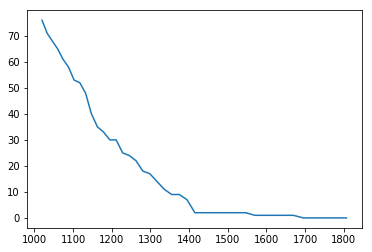

In [6]:
%pylab inline

import numpy as np
import scipy.stats as stats

from simpleac import SimPleAC
from monte_carlo import monte_carlo_results
from robust.robust import RobustModel


# f = figure(figsize=(12, 6))
perfs = []
failures  = []

for gamma in np.linspace(0, 0.7, 41):
    wing_weight_pr = 10.
    tsfc_pr = 10.
    v_min_pr = 20.
    range_pr = 10.

    # EXPERIMENT PARTICIPANTS: DON'T MODIFY BELOW THIS!!! #

#     np.random.seed(seed=246)
#         print stats.norm.rvs()
    m = SimPleAC(wing_weight_pr, tsfc_pr, v_min_pr, range_pr)
#     np.random.seed(seed=246)
#         print stats.norm.rvs()
    nominal_sol = m.localsolve(verbosity=0)

#     np.random.seed(seed=246)
#         print stats.norm.rvs()
    rm = RobustModel(m, "elliptical", gamma=gamma, twoTerm=False,
                     boyd=False, simpleModel=False,
                     nominalsolve=nominal_sol)
#     np.random.seed(seed=246)
#         print stats.norm.rvs()
    rm_sol = rm.robustsolve(verbosity=0,
                            minNumOfLinearSections=3,
                            maxNumOfLinearSections=99,
                            linearizationTolerance=1e-4)
#     print rm_sol("C_L")
#     np.random.seed(seed=246)
#         print stats.norm.rvs()
    perf, failure = monte_carlo_results(m, sol=rm_sol)
#     np.random.seed(seed=246)
#         print stats.norm.rvs()
    perfs.append(perf)
    failures.append(failure)
plot(perfs, failures)

In [ ]:
p41, f41 = perfs, failures
figure(figsize=(12, 8))
plot(perfsg, failuresg, "-o")
# plot(p21, f21, "-x")
plot(p41, f41, "-+")
grid()
xlim(1000, 1800)
ylim(0, 80)

In [1]:
perfs = [1019.7743072756472, 1032.9725989518704, 1046.4061143398794, 1060.0805781659224, 1074.0017863593753, 1088.1756828657847, 1102.6085248138868, 1117.3066457085897, 1132.2766015164893, 1147.5251460676013, 1163.059237459321, 1178.886044631051, 1195.0129541116255, 1211.447576938435, 1228.1977557467944, 1245.271572027678, 1262.6773535498396, 1280.4236819412108, 1298.5194004231953, 1316.9736216894867, 1335.7957359189836, 1354.9954189101359, 1374.5826403214496, 1394.5676720000843, 1414.9610963774057, 1435.773814905881, 1457.0170565088588, 1478.7023860093948, 1500.8417124989273, 1523.447297602712, 1546.531763594669, 1570.1081012752263, 1594.189677610427, 1618.7902429887286, 1643.9239380512215, 1669.6052999886624, 1695.849268201458, 1722.6709107399322, 1750.0864691467884, 1778.111891043543, 1806.763759321267]

In [ ]:
failures = [76.0, 71.0, 68.0, 65.0, 61.0, 58.0, 53.0, 52.0, 48.0, 40.0, 35.0, 33.0, 30.0, 30.0, 25.0, 24.0, 22.0, 18.0, 17.0, 14.0, 11.0, 9.0, 9.0, 7.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [ ]:
%pylab inline

wing_weight_pr = 10
tsfc_pr = 10.
v_min_pr = 20.
range_pr = 10.

# EXPERIMENT PARTICIPANTS: DON'T MODIFY BELOW THIS!!! #


from simpleac import SimPleAC
from monte_carlo import monte_carlo_results
from robust.robust import RobustModel
from gpkit import Variable, units

perfsg, failuresg = [], []
for perf in perfs:
    gamma = Variable('Gamma', '-', 'Uncertainty bound')
    m = SimPleAC(wing_weight_pr, tsfc_pr, v_min_pr, range_pr)
    nominal_sol = m.localsolve(verbosity=0)

    m.append(m["W_f"] <= perf*units.lbf)
    m.append(gamma <= 1e30)
    m.cost = 1/gamma

    rm = RobustModel(m, "box", gamma=gamma,
                     twoTerm=False, boyd=False, simpleModel=True,
                     nominalsolve=nominal_sol)

    rm_sol = rm.robustsolve(verbosity=0)
    m = SimPleAC(wing_weight_pr, tsfc_pr, v_min_pr, range_pr)
    perf, failure = monte_carlo_results(m, sol=rm_sol)
    perfsg.append(perf)
    failuresg.append(failure)


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['gamma']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Fuel consumption: 1019 lbs
    Failure rate:  76% 
Fuel consumption: 1032 lbs
    Failure rate:  71% 
Fuel consumption: 1046 lbs
    Failure rate:  68% 
Fuel consumption: 1060 lbs
    Failure rate:  65% 
Fuel consumption: 1074 lbs
    Failure rate:  61% 
Fuel consumption: 1088 lbs
    Failure rate:  58% 
Fuel consumption: 1102 lbs
    Failure rate:  53% 
Fuel consumption: 1117 lbs
    Failure rate:  52% 
Fuel consumption: 1132 lbs
    Failure rate:  48% 
Fuel consumption: 1147 lbs
    Failure rate:  40% 
Fuel consumption: 1163 lbs
    Failure rate:  35% 
Fuel consumption: 1178 lbs
    Failure rate:  33% 
Fuel consumption: 1195 lbs
    Failure rate:  30% 
Fuel consumption: 1211 lbs
    Failure rate:  30% 
Fuel consumption: 1228 lbs
    Failure rate:  25% 
Fuel consumption: 1245 lbs
    Failure rate:  24% 
Fuel consumption: 1262 lbs
    Failure rate:  22% 
Fuel consumption: 1280 lbs
    Failure rate:  18% 
Fuel consumption: 1298 lbs
    Failure rate:  17% 
Fuel consumption: 1316 lbs
    

In [14]:
import numpy as np
import scipy.stats as stats

from simpleac import SimPleAC
from monte_carlo import monte_carlo_results
from robust.robust import RobustModel


f = figure(figsize=(12, 6))
perfs = []
failures  = []

# np.random.seed(seed=246)
# #         print stats.norm.rvs()
# m = SimPleAC(wing_weight_pr, tsfc_pr, v_min_pr, range_pr)
# np.random.seed(seed=246)
# #         print stats.norm.rvs()
# nominal_sol = m.localsolve(verbosity=0)

# np.random.seed(seed=246)
# #         print stats.norm.rvs()
# rm = RobustModel(m, "elliptical", gamma=gamma, twoTerm=False,
#                  boyd=False, simpleModel=False,
#                  nominalsolve=nominal_sol)
# rm_sol = rm.robustsolve(verbosity=0,
#                             minNumOfLinearSections=3,
#                             maxNumOfLinearSections=99,
#                             linearizationTolerance=1e-4)

for _ in range(11):
    gamma = 0.3
    wing_weight_pr = 10.
    tsfc_pr = 10.
    v_min_pr = 20.
    range_pr = 10.

    np.random.seed(seed=246)
#         print stats.norm.rvs()
    m = SimPleAC(wing_weight_pr, tsfc_pr, v_min_pr, range_pr)
    np.random.seed(seed=246)
#         print stats.norm.rvs()
    nominal_sol = m.localsolve(verbosity=0)

    np.random.seed(seed=246)
#         print stats.norm.rvs()
    rm = RobustModel(m, "elliptical", gamma=gamma, twoTerm=False,
                     boyd=False, simpleModel=True,
                     nominalsolve=nominal_sol)
    np.random.seed(seed=246)
#         print stats.norm.rvs()
    rm_sol = rm.robustsolve(verbosity=0,
                            minNumOfLinearSections=50,
                            maxNumOfLinearSections=50,
                            linearizationTolerance=1e-5)
    np.random.seed(seed=246)
#         print stats.norm.rvs()
    perf, failure = monte_carlo_results(m, sol=rm_sol)
    
    perfs.append(perf)
    failures.append(failure)
plot(failures)

Fuel consumption: 1282 lbs
    Failure rate:  23% 
Fuel consumption: 1282 lbs
    Failure rate:  30% 
Fuel consumption: 1282 lbs
    Failure rate:  21% 
Fuel consumption: 1282 lbs
    Failure rate:  22% 
Fuel consumption: 1282 lbs


KeyboardInterrupt: 

In [19]:
#### %pylab inline

import numpy as np
import scipy.stats as stats

from simpleac import SimPleAC
from monte_carlo import monte_carlo_results
from robust.robust import RobustModel


f = figure(figsize=(12, 6))
perfs = []
failures  = []
from gpkit import Variable
Gamma = Variable('\\Gamma', '-', 'Uncertainty bound')

for _ in range(11):
    wing_weight_pr = 10.
    tsfc_pr = 10.
    v_min_pr = 20.
    range_pr = 10.

    np.random.seed(seed=246)
#         print stats.norm.rvs()
    m = SimPleAC(wing_weight_pr, tsfc_pr, v_min_pr, range_pr)
    m.append(m["W_f"] <= 1200*m["W_f"].units)
    m.append(Gamma <= 1e-30)
    m.cost = 1/Gamma
    np.random.seed(seed=246)

    np.random.seed(seed=246)
#         print stats.norm.rvs()
    rm = RobustModel(m, "elliptical", gamma=gamma, twoTerm=False,
                     boyd=False, simpleModel=True)
    np.random.seed(seed=246)
#         print stats.norm.rvs()
    rm_sol = rm.robustsolve(verbosity=0,
                            minNumOfLinearSections=50,
                            maxNumOfLinearSections=50,
                            linearizationTolerance=1e-5)
    np.random.seed(seed=246)
#         print stats.norm.rvs()
    perf, failure = monte_carlo_results(m, sol=rm_sol)
    
    perfs.append(perf)
    failures.append(failure)
plot(failures)

RuntimeWarning: problem unsolved after 52 iterations.

    The last result is available in Model.program.gps[-1].result. If the gps
    appear to be converging, you may wish to increase the iteration limit by
    calling .localsolve(..., iteration_limit=NEWLIMIT).

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['gamma']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


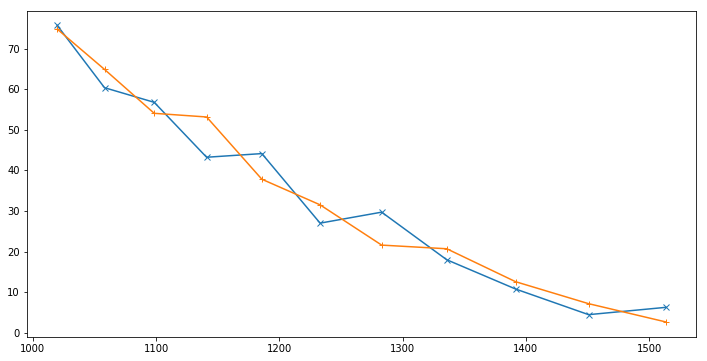

In [32]:
p2 = perfs
f2 = failures
f = figure(figsize=(12, 6))
plot(p1, f1, "-x")
plot(p2, f2, "-+")

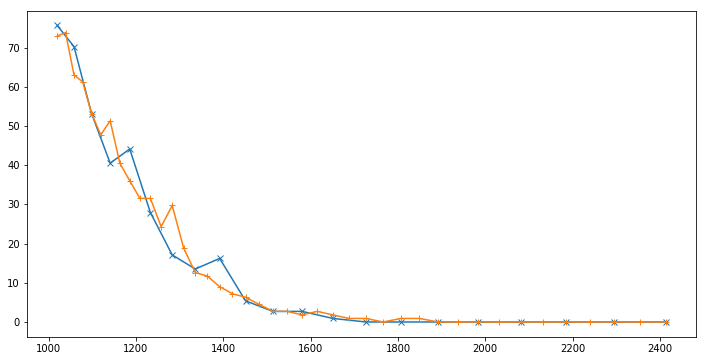

In [28]:
# perfs1 = perfs
# fails1 = failures
f = figure(figsize=(12, 6))
plot(perfs1, fails1, "-x")
plot(perfs2, fails2, "-+")